<a href="https://colab.research.google.com/github/mtcorreia/CI_AI_ADS/blob/main/Aula_11_e_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!sudo apt install lshw

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
lshw is already the newest version (02.19.git.2021.06.19.996aaad9c7-2build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [39]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


# Usando IA para descoberta da ocorrência de Diabetes.

14 de Junho de 2024.

## Dataset do repositório de ML da UCI/Kaggle.


In [40]:
# Importando os módulos.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [41]:
# Carregando o dataset.
df = pd.read_csv("pima-data.csv")

In [42]:
# Verificando o formato dos dados.
df.shape

(768, 10)

In [43]:
df.describe

<bound method NDFrame.describe of      num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
0           6           148            72         35        0  33.6   
1           1            85            66         29        0  26.6   
2           8           183            64          0        0  23.3   
3           1            89            66         23       94  28.1   
4           0           137            40         35      168  43.1   
..        ...           ...           ...        ...      ...   ...   
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age    skin  diabetes  
0        0.627   50  1.3790      True  
1        0.351   31  1.1426     False  
2        0.672   32  0.0000      True  
3        0.167   21  0.9062     False  
4        2.288   33  1.3790      True  
..         ...  ...     ...       ...  
763      0.171   63  1.8912     False  
764      0.340   27  1.0638     False  
765      0.245   30  0.9062     False  
766      0.349   47  0.0000      True  
767      0.315   23  1.2214     False  

[768 rows x 10 columns]>

In [44]:
# Verificando as primeiras linhas do dataset.
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [45]:
# Verificando as últimas linhas do dataset.
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [46]:
# Verificando se existem valores nulos.
df.isnull().values.any()

False

In [47]:
# Identificando a correlação entre as variáveis.
# OBS.: Correlação não implica em causalidade.
def plot_corr(df, size = 10):
  corr = df.corr()
  fig, ax = plt.subplots(figsize = (size, size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

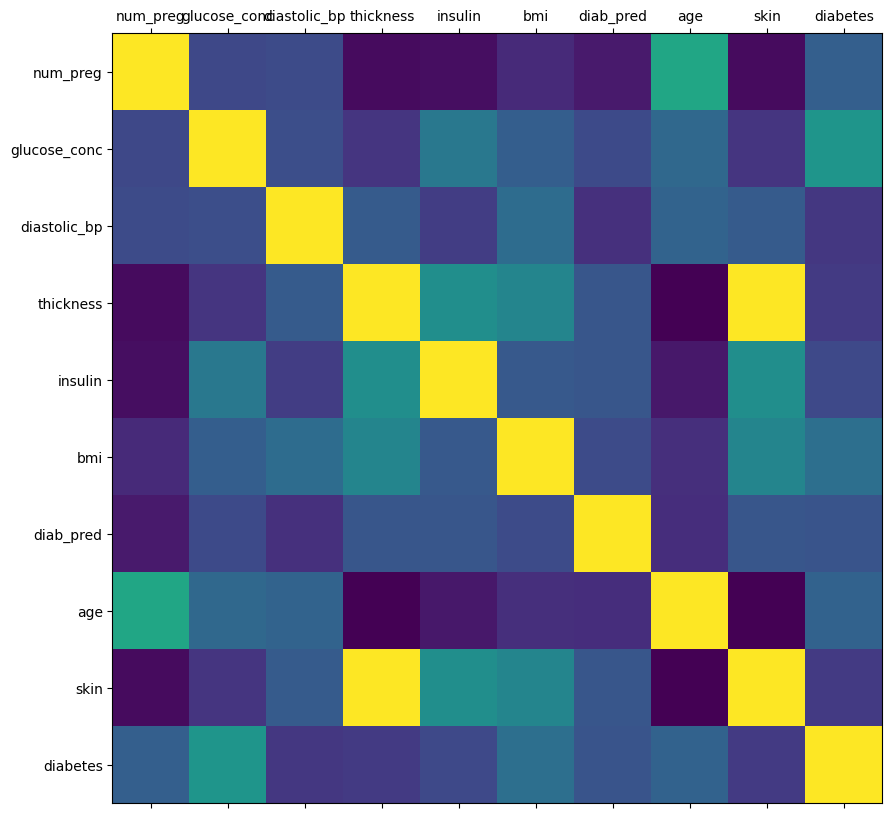

In [48]:
# Criando o gráfico.
plot_corr(df)

In [49]:
# Visualização matricial da correlação.
# +1 = forte correlação positiva.
# 0 = não há correlação.
# -1 = forte correlação negativa.
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [50]:
# Definindo as classes.
diabetes_map = {True: 1, False: 0}

In [51]:
# Aplicando o mapeamento ao dataset.
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [52]:
# Verificando a alteração.
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [53]:
# Verificando como os dados estão distribuídos.
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos: 500 (65.10%)


## Spliting.
### 70% para dados de treino e 30% para dados de teste.

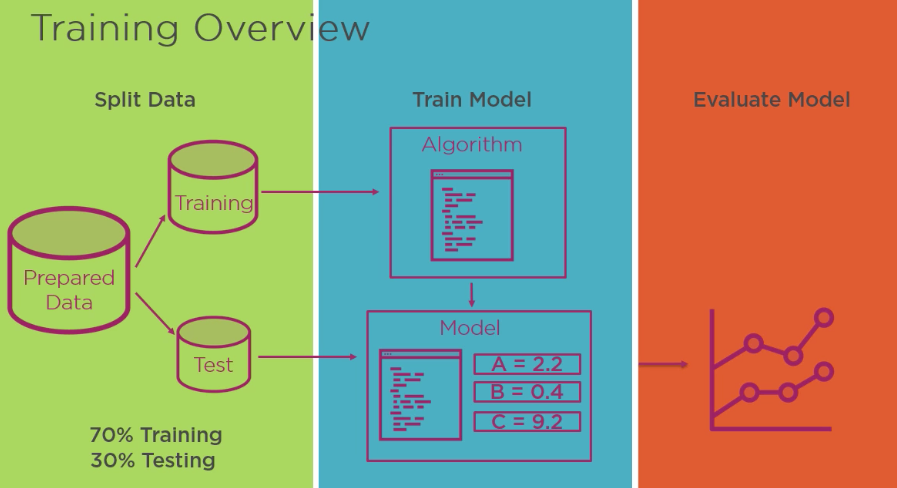

In [87]:
from IPython.display import Image
Image('Treinamento.png')

In [55]:
# Importando os módulos.
from sklearn.model_selection import train_test_split

In [56]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [57]:
# Variável a ser prevista.
atrib_prev = ['diabetes']

In [58]:
# Criando objetos divididos pelos grupos.
X = df[atributos].values
Y = df[atrib_prev].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [59]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [60]:
# Definindo a taxa de split.
split_test_size = 0.30

In [61]:
# Criando dados de treino e de teste.
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=split_test_size, random_state=44)

In [62]:
X_treino.shape

(537, 8)

In [63]:
X_teste.shape

(231, 8)

In [64]:
Y_teste.shape

(231, 1)

In [65]:
Y_treino.shape

(537, 1)

## Valores Missing Ocultos.

In [66]:
# Verificando se existem valores nulos.
df.isnull().values.any()

False

In [67]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [68]:
print("# Linhas no Dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['age'] == 0])))


# Linhas no Dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing age: 0


## Tratando os dados missing ocultos.

In [69]:
from sklearn.impute import SimpleImputer

In [70]:
# Criando o objeto.
preenche_0 = SimpleImputer(missing_values=0, strategy="mean")

# Substituindo os valores iguais a 0 pela média dos dados.
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

In [71]:
X_treino

array([[  1.        , 146.        ,  56.        , ...,  29.7       ,
          0.564     ,  29.        ],
       [  4.33982684, 128.        ,  68.        , ...,  30.5       ,
          1.391     ,  25.        ],
       [  4.        ,  95.        ,  60.        , ...,  35.4       ,
          0.284     ,  28.        ],
       ...,
       [  1.        ,  79.        ,  60.        , ...,  43.5       ,
          0.678     ,  23.        ],
       [  4.33982684, 181.        ,  88.        , ...,  43.3       ,
          0.222     ,  26.        ],
       [  3.        , 129.        ,  64.        , ...,  26.4       ,
          0.219     ,  28.        ]])

## 50% a 80% do tempo de trabalho de um Cientista de Dados é usado na exploração e preparação de dados.

In [72]:
# Utilizando um classificador Naive Bayes.
from sklearn.naive_bayes import GaussianNB

In [73]:
# Criando o modelo preditivo.
modelo_v1 = GaussianNB()

In [74]:
# Treinando o modelo.
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB()

In [78]:
# Verificando a exatidão no modelo de dados de treino.
from sklearn import metrics

In [91]:
nb_predict_train = modelo_v1.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy): 0.7412



In [90]:
# Verificando a exatidão no modelo dos dados de Testes.
nb_predict_teste = modelo_v1.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_teste)))
print()

Exatidão (Accuracy): 0.7965



## Métricas e Matriz de Confusão.

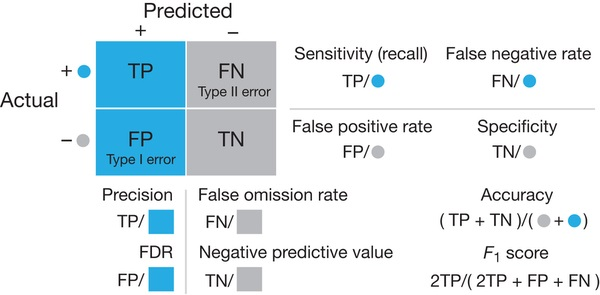

In [86]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [106]:
# Criando uma Confusion Matrix.
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_teste), labels = [1, 0]))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_teste))

Confusion Matrix
[[128  13]
 [ 38  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       141
           1       0.80      0.58      0.67        90

    accuracy                           0.78       231
   macro avg       0.79      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



## Otimizando o modelo com RandomForest.

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
modelo_v2 = RandomForestClassifier(random_state=42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=42)

In [102]:
# Verificando a exatidão do Treino.
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))
print()

Exatidão (Accuracy): 1.0000



In [103]:
# Verificando a exatidão dos Testes.
rf_predict_teste = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_teste)))
print()

Exatidão (Accuracy): 0.7792



In [108]:
# Criando uma Confusion Matrix.
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_teste), labels = [1, 0]))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_teste))

Confusion Matrix
[[128  13]
 [ 38  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       141
           1       0.80      0.58      0.67        90

    accuracy                           0.78       231
   macro avg       0.79      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



## Analisando o desempenho de mais um algoritmo de classificação: REGRESSÃO LOGÍSTICA.

In [109]:
from sklearn.linear_model import LogisticRegression

In [114]:
# Terceira versão do modelo usando Regrssão Logística.
modelo_v3 = LogisticRegression(C=0.7, random_state=42)
modelo_v3.fit(X_treino, Y_treino.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.7, random_state=42)

In [115]:
# Verificando a exatidão dos Testes.
lr_predict_teste = modelo_v3.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_teste)))
print()

Exatidão (Accuracy): 0.8052



In [117]:
# Criando uma Confusion Matrix.
print("Confusion Matrix:")
print("{0}".format(metrics.confusion_matrix(Y_teste, lr_predict_teste), labels = [1, 0]))
print("")

print("Classification Report:")
print(metrics.classification_report(Y_teste, lr_predict_teste))

Confusion Matrix:
[[132   9]
 [ 36  54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.85       141
           1       0.86      0.60      0.71        90

    accuracy                           0.81       231
   macro avg       0.82      0.77      0.78       231
weighted avg       0.81      0.81      0.80       231



## Summary
Resultado comparativo do desempenho dos algoritmo de classificação:

#### Modelo usando Algoritmo Naive Bayes (v1): 0.79
#### Modelo usando Algoritmo RandomForest (v2): 0.77
#### Modelo usando Algoritmo Regressão Logística (v3): 0.8


## Fazendo previsões com o modelo treinado (v3).

In [118]:
import pickle

In [119]:
# Salvando o modelo para usar na minha empresa.
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [122]:
# Carregando o modelo e fazendo com novos conjunto de dados.
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_teste[15].reshape(1, -1))
result2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print(result)
print(result2)

[1]
[0]


In [123]:
X_treino[15]

array([  4.33982684, 138.        ,  60.        ,  35.        ,
       167.        ,  34.6       ,   0.534     ,  21.        ])

In [124]:
X_treino[18]

array([  1.        , 107.        ,  50.        ,  19.        ,
       155.06551724,  28.3       ,   0.181     ,  29.        ])

In [126]:
df.head(20)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
5,5,116,74,0,0,25.6,0.201,30,0.0000,0
6,3,78,50,32,88,31.0,0.248,26,1.2608,1
7,10,115,0,0,0,35.3,0.134,29,0.0000,0
8,2,197,70,45,543,30.5,0.158,53,1.7730,1
9,8,125,96,0,0,0.0,0.232,54,0.0000,1
